# **Hitarth Sharma**
# **The Spark Foundation GRIPFEB2021**
# **Task-1 : Prediction using Supervised ML**
### PredictIon of percentage of a student based on the number of study hours. 

### Importing the libraries and the dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print('Data imported succesfully')
print('shape of the data is', data.shape)
data.head(10)

Data imported succesfully
shape of the data is (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the data points to understand and interpret the relationship of this data

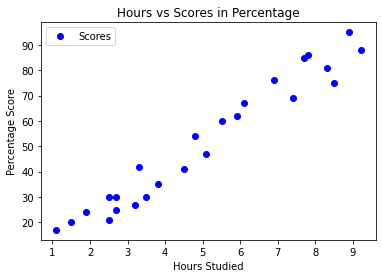

In [10]:
data.plot(x='Hours', y='Scores', style='o',c='b')
plt.title('Hours vs Scores in Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Preparing the data

Now we divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now we split this data into training and test sets

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Training the algorithm

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print('Training completed')

Training has been completed!


### Plotting the regression line

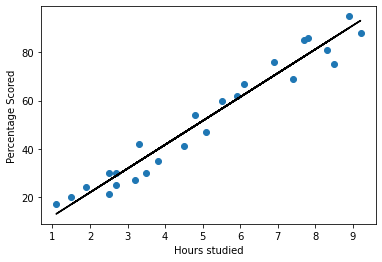

In [15]:
line = regressor.coef_* x + regressor.intercept_
plt.scatter(x,y)
plt.plot(x, line, color = "black")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

### Making predictions

In [16]:
print(x_test) # testing data (in Hours)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Actual vs Predicted
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
hours = [[9.25]]
pred_value = regressor.predict(hours)
print('Number of hours : {}'.format(hours))
print('Predicted Score : {}'.format(pred_value[0]))

Number of hours : [[9.25]]
Predicted Score : 93.69173248737539


### Evaluating the model using mean absolute error
Now we evaluating the performance of algorithm using mean absolute error.


In [22]:
from sklearn import metrics
print('Mean Aboslute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Aboslute Error:  4.183859899002982


### Conclusion : The student who studies for 9.25 hours a day might get a predicted score of 93.69 
